# 1

In [144]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           5.35e-34
Time:                        10:54:10   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.0238      4.708     -5.102      0.0

# 2 

1.9101 의 가중치를 가지는 Decor가 가격에 가장 크게 영향을 미치는 변수이다. 이 변수는 유의수준 5% 내에서 t-statistics의 p-value가 충분히 크기 때문에 유의하다.

# 3

2.0681 의 파라미터로 영향을 미친다고 할 수 있다. 

# 4

상수항과 Service 항목의 t-statistics'p-value가 작기 때문에 실제 값이 0일 가능성이 높다. 따라서 유의하지 않다.

# 5

const, Service 항목을 Drop하고 다시 회귀분석을 한 결과, 남은 세 가지 변수 Food, Decor,East의 파라미터가 0.4913 1.7721 2.2858 로 변하였다.

# 6

첫 번째 선형회귀분석에서 예측한 파라미터들에 주어진 데이터를 적용해서 종속 변수를 구하게 되면,-24.0238 + 1.5381*20 + 1.9101*20 + (-0.0027)*20 + 2.0681 * 1 = 46.954299999999996

# 7

# 8

# 9

In [180]:
import pandas as pd
import statsmodels.api as sm

df0 = pd.read_csv("http://www.stat.tamu.edu/~sheather/book/docs/datasets/nyc.csv", encoding='latin1')
del df0["Case"]
df = sm.add_constant(df0)
df.tail()

,const,Restaurant,Price,Food,Decor,Service,East
163,1.0,Baci,31,17,15,16,0
164,1.0,Puccini,26,20,16,17,0
165,1.0,Bella Luna,31,18,16,17,0
166,1.0,Métisse,38,22,17,21,0
167,1.0,Gennaro,34,24,10,16,0


In [181]:
df.drop(columns='Restaurant',inplace=True)
df.tail()

,const,Price,Food,Decor,Service,East
163,1.0,31,17,15,16,0
164,1.0,26,20,16,17,0
165,1.0,31,18,16,17,0
166,1.0,38,22,17,21,0
167,1.0,34,24,10,16,0


In [182]:
for col in list(df.columns):
    df[col] = df[col].astype('float')
df.dtypes

const      float64
Price      float64
Food       float64
Decor      float64
Service    float64
East       float64
dtype: object

In [184]:
dfy = df.Price
df.drop(columns = 'Price',inplace=True)

In [185]:
model = sm.OLS(dfy,df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     68.76
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           5.35e-34
Time:                        11:41:41   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1069.
Df Residuals:                     163   BIC:                             1084.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.0238      4.708     -5.102      0.0

Service parameter is not significant value in this test. So let's ommit it.

In [205]:
df.drop(columns='Service',inplace=True)
df.tail()

,const,Food,Decor,East
163,1.0,17.0,15.0,0.0
164,1.0,20.0,16.0,0.0
165,1.0,18.0,16.0,0.0
166,1.0,22.0,17.0,0.0
167,1.0,24.0,10.0,0.0


In [206]:
model2 = sm.OLS(dfy,df)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     92.24
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           5.10e-35
Time:                        11:57:29   Log-Likelihood:                -529.36
No. Observations:                 168   AIC:                             1067.
Df Residuals:                     164   BIC:                             1079.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.0269      4.673     -5.142      0.0

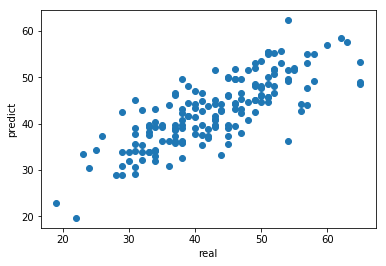

In [207]:
dfy_new = result2.predict(df)
plt.scatter(dfy,dfy_new)
plt.xlabel('real')
plt.ylabel('predict')
plt.show()

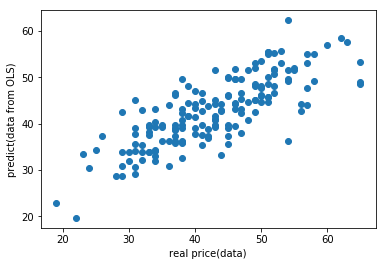

In [192]:
import matplotlib.pylab as plt
dfy_new = result.predict(df)
plt.scatter(dfy,dfy_new)
plt.xlabel('real price(data)')
plt.ylabel('predict(data from OLS)')
plt.show()

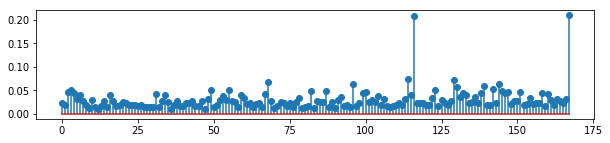

In [198]:
influence = result.get_influence() #영향도 정도 객체
hat = influence.hat_matrix_diag
# 위의 객체는 hat_matrix_diag속성으로 레버레지 벡터를 가지고 있다.
plt.figure(figsize=(10,2))
plt.stem(hat)
plt.show()

In [202]:
hat.sum()
import numpy as np
np.average(hat)

0.02976190476190476

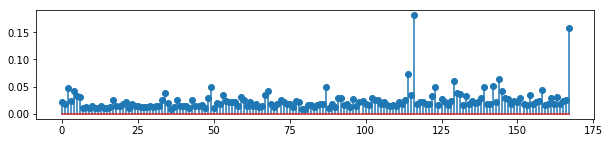

In [208]:
influence = result2.get_influence() #영향도 정도 객체
hat = influence.hat_matrix_diag
# 위의 객체는 hat_matrix_diag속성으로 레버레지 벡터를 가지고 있다.
plt.figure(figsize=(10,2))
plt.stem(hat)
plt.show()

In [210]:
hat.sum()
np.average(hat)

0.023809523809523808

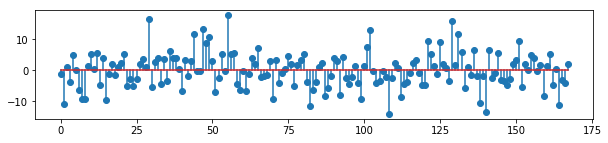

In [215]:
plt.figure(figsize=(10,2))
plt.stem(result.resid)
plt.show()

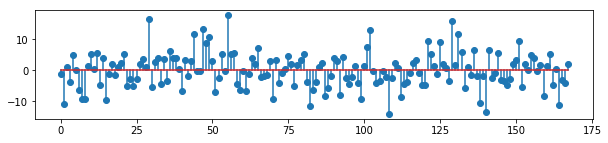

In [216]:
plt.figure(figsize=(10,2))
plt.stem(result2.resid)
plt.show()

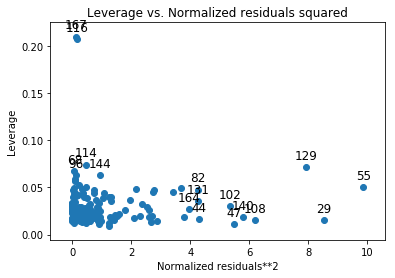

In [217]:
sm.graphics.plot_leverage_resid2(result)
plt.show()

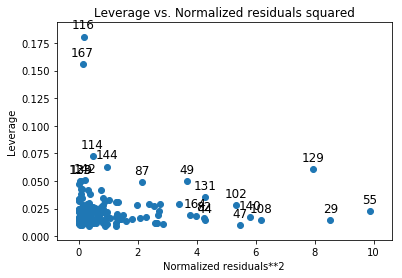

In [218]:
sm.graphics.plot_leverage_resid2(result2)
plt.show()

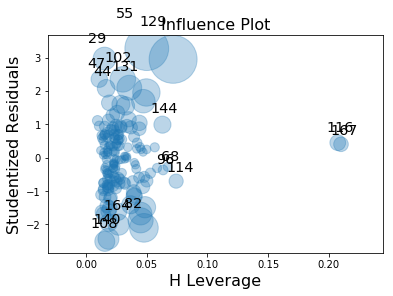

In [219]:
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

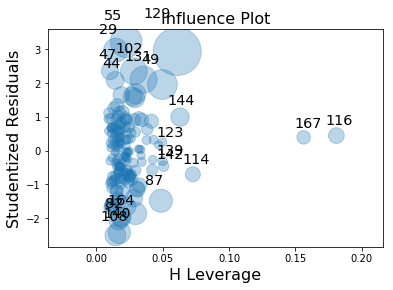

In [220]:
sm.graphics.influence_plot(result2, plot_alpha=0.3)
plt.show()